# Agent-Based Modeling of Marriages from Online Dating

#### Serena Chen and Apurva Raman

### Replicating the experiment in the [Strength of Absent Ties: Social Integration via Online Dating](https://arxiv.org/pdf/1709.10478.pdf.)

In [1]:
from __future__ import print_function, division

# %matplotlib inline
# %precision 3

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from marriages_replication import *

# from matplotlib import rc
# rc('animation', html='html5')

## Creating network

In [2]:
agents_per_race = 100
races = 3
agents = agents_per_race*races
genders=getGender(agents_per_race,races)
print(genders)

[[ 1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.
   0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.
   1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.
   0.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.
   0.  1.  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
   1.  1.  0.  1.  0.  1.  0.  1.  0.  0.]
 [ 1.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.
   0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
   0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.
   0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
   1.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
   1.  1.  0.  1.  1.  0.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.
   0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  0.
   1.  0.  0.  1.  1.  1. 

In [3]:
social_beliefs, political_beliefs = createPersonality(agents_per_race, races)
print ((social_beliefs,political_beliefs))

(array([ 0.7682411 ,  0.36809023,  0.94821207,  0.84968173,  0.17298553,
        0.22613575,  0.58894585,  0.63328545,  0.03464121,  0.59254207,
        0.20058075,  0.86974741,  0.54979955,  0.5901745 ,  0.32217581,
        0.63735081,  0.58952218,  0.15113124,  0.24957833,  0.34888168,
        0.55347716,  0.65079233,  0.16352918,  0.92317518,  0.97491199,
        0.08627847,  0.01210906,  0.42997712,  0.77043949,  0.10835176,
        0.9563956 ,  0.64048103,  0.26603273,  0.10998934,  0.27106223,
        0.06823952,  0.1123413 ,  0.23042076,  0.2260629 ,  0.96685079,
        0.23212753,  0.16402633,  0.57517922,  0.09904568,  0.89568912,
        0.90437281,  0.55315859,  0.85314071,  0.22965035,  0.85661605,
        0.73565707,  0.04699459,  0.60109188,  0.14790448,  0.57292631,
        0.04453954,  0.43128386,  0.36892409,  0.62116196,  0.24885256,
        0.67916534,  0.75380206,  0.52375238,  0.29067338,  0.72463455,
        0.88738108,  0.80083289,  0.86008096,  0.09501888,  0.2

In [4]:
adj, adj2, adj3 = createAdj(agents_per_race, races)

In [5]:
distances = getPersonalityDistances(agents, adj3, genders, social_beliefs, political_beliefs)
print(distances)

[[        inf  0.4060047   0.58322295 ...,  0.71554348  0.70484312
          inf]
 [ 0.4060047          inf         inf ...,         inf         inf
   0.79745952]
 [ 0.58322295         inf         inf ...,         inf         inf
   0.10194547]
 ..., 
 [ 0.71554348         inf         inf ...,         inf         inf
   0.08374219]
 [ 0.70484312         inf         inf ...,         inf         inf
   0.68968716]
 [        inf  0.79745952  0.10194547 ...,  0.08374219  0.68968716
          inf]]


## Creating Marriages

In [6]:
marriage, distances = createMarriages(agents, distances,genders)
print("-----------------------------")
print(marriage)
print(distances)

-----------------------------
[277 257  81 128 259 182  83 246 263 149 262  67 162 284 223 174  79  22
  63 272 129  78  17 179 170  -1 220 221 175 217 292  58  59 285  87 215
  98 213 168 279 282 106  94 167 140 299 139 264 186 112 204 183 142 222
 125 216 242 281  31  32 296 192 163  18 113 202 237  11  88 160 225  93
 230 270 159 102  80 136  21  16  76   2 295   6 210  -1 169  34  68  97
 189 253 269  71  42 245 211  89  36 177 235 144  75 207 248 218  41 141
 231 205 187 134  49  64 171 236 196 232 166 193 258 214 197 130 194  54
 156 268   3  20 123 158 155 266 111 146  77 188 173  46  44 107  52 260
 101 176 135 286 293   9 254 152 151 234 280 132 126 239 131  74  69 247
  12  62 195 250 118  43  38  86  24 114 184 138  15  28 145  99 201  23
 289 227   5  51 172 276  48 110 137  90 251 278  61 119 124 164 116 122
 275 271 255 178  65 252  50 109 241 103 274 212  84  96 209  37 121  35
  55  29 105 256  26  27  53  14 265  70 238 181 243 283  72 108 117 291
 153 100 115  66 226 

## Welfare measures

In [7]:
avg_dist = averageDistances(distances, marriage)
print(avg_dist)

0.0815675802935


In [8]:
num_intra = numIntraracial(marriage, agents_per_race, races)
print(num_intra)

54.0


In [9]:
num_inter = numInterracial(num_intra, marriage)
print(num_inter)

95.0


In [10]:
diversity,percent_married,compatibility = welfareRatios(num_intra, num_inter, marriage, races, agents_per_race, avg_dist)
print('diversity (race)', diversity)
print('compatibility (avgdist)', compatibility)
print('percent married (number)', percent_married)

diversity (race) 0.956375838926
compatibility (avgdist) 0.94232301085
percent married (number) 0.993333333333


## Plotting a range of results

[ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
  0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
  0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
  0.94736842  1.        ]


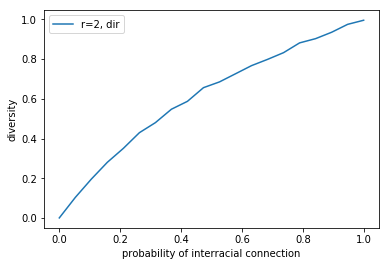

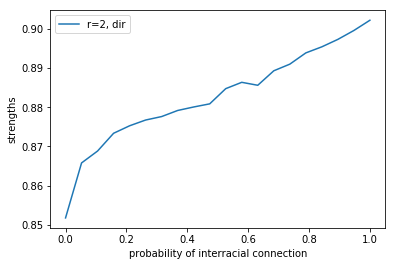

In [14]:

probabilities = np.linspace(0.0, 1.0, num=20, dtype=float)
num_sims = 500
print(probabilities)

diversities = []
strengths = []

for prob_interracial in probabilities:
    div_sum = 0.0
    str_sum = 0.0
    for _ in range(num_sims):
        div, married, strength = runSim(50, 2, 1.0, prob_interracial)
        div_sum += div
        str_sum += strength
    diversities.append(div_sum/num_sims)
    strengths.append(str_sum/num_sims)

plt.figure()
plt.xlabel('probability of interracial connection')
plt.ylabel('diversity')
r2dir_div, = plt.plot(probabilities, diversities, label='r=2, dir')
plt.legend(handles=[r2dir_div])
plt.figure()
plt.xlabel('probability of interracial connection')
plt.ylabel('strengths')
r2dir_str, = plt.plot(probabilities, strengths, label='r=2, dir')
plt.legend(handles=[r2dir_str])
plt.show()
    